In [7]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
# calculate the mean of each column
M = mean(A.T, axis=1)
print(M)
# center columns by subtracting column means
C = A - M
print(C)
# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)
print("Here",np.shape(V))
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
print(P.T)
print(np.shape(vectors))

[[1 2]
 [3 4]
 [5 6]]
[3. 4.]
[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]
[[4. 4.]
 [4. 4.]]


NameError: name 'np' is not defined

In [187]:
import numpy as np
import scipy.linalg as la
import scipy.spatial as sp

In [ ]:
class PCA(): #Algorithms in guide.pdf used, pg 15-17
    def __init__(self, Xtrain):
        # Alg 1: Compute principal components
        self.C = np.cov(Xtrain)
        self.D, self.U = la.eigh(self.C) #eigenvalues,eigenvectors
        
        #arrange in descending order
        descending = np.flip(np.argsort(self.D))
        self.D = self.D[descending]
        self.U = self.U[:,descending]
        
        self.mean_ = np.mean(Xtrain,axis=0)#mean
        
    def project(self, Xtest, m):
        # Alg 2: Project to low dim space
        Z=np.empty((Xtest.shape[0],m)) #create output array
        X_center = np.subtract(Xtest,self.mean_) #center data
        for i in range(Xtest.shape[0]): #loop through samples
            z=np.multiply(self.U[i][:m].T,X_center[i][:m]).T #compute
            Z=np.append(Z,[z],axis=0) 
        return Z
    
    def denoise(self,Xtest,m):
        Z=self.project(Xtest,m) 
        # Alg 3: Reconstruct in original space after project to low space
        Y=np.empty(Xtest.shape) #create output array
        for i in range(Xtest.shape[0]): #loop through samples
            y=self.mean_+Z[i][:m].dot(self.U[i][:m]) #compute
            Y=np.append(Y,[y],axis=0)
        return Y


In [ ]:
Xtrain=array([[5, 7,1], [2,1,4],[7,1,1]])
Xtest=array([[5, 7,1], [2,1,4],[7,1,1]])
print(Xtrain)
print(Xtest)
print(Xtest.shape[0])
print(PCA(Xtrain).D)
print(PCA(Xtrain).U)
print(PCA(Xtrain).mean_)
print("____________________________________")
print(PCA(Xtrain).project(Xtest,2))
print("____________________________________")
print(PCA(Xtrain).denoise(Xtest,3))

In [ ]:
print(Xtrain)
print(Xtrain-PCA(Xtrain).mean_)


In [ ]:
dube=5
for i in range(dube):
    print(i)


In [ ]:
x1 = np.arange(9.0).reshape((3, 3))
print(x1)
x2 = np.arange(3.0).reshape((3,1))
print(x2)
np.subtract(x1, x2)

In [ ]:
n_samples, n_features = np.shape(Xtest)
print(n_samples,n_features)

In [ ]:
mean_ = np.mean(Xtrain,axis=1)
print(mean_.shape)
print(np.shape(np.vstack(mean_)))
C = np.cov(Xtrain)
D, U = la.eigh(C)
print(np.shape(U))

In [ ]:
x1 = np.arange(9.0).reshape((3, 3))
print(x1)
x2 = np.arange(3.0)
print(x2)
np.multiply(x1, x2)

In [ ]:
result_array = np.empty((0, 100))

for line in data_array:
    result = do_stuff(line)
    result_array = np.append(result_array, [result], axis=0)

In [ ]:
def gammaidx(X, k):
    n,d=X.shape
    #Calculate distance matrix
    D=sp.distance_matrix(X,X)
    #y=np.empty((n,1))#create output array
    y=[]
    #Find all k nearest neigbours
    for i in range(n):
        D_0=np.asarray(D[i][:])#array of distances relative to i'th data point
        point=D_0[i]#value at i'th data point
        gamma=0
        for j in range(k): #repeat for k nearest neigbours
            idx=(np.abs(D_0-point)).argmin()#find nearest neighbour
            gamma+=np.abs(D_0[idx]-point)/k #add distance/k to gamma for that point
            D_0=np.delete(D_0,idx) #remove nearest neighbour from list
            
        y=np.append(y,[gamma],axis=0)
    
    return y

In [ ]:
X=np.array([[1,6,3,4,5],[1,5,6,2,23],[1,7,5,2,3],[1,2,3,4,5],[1,4,-3,-1,0]])
print(np.shape(X))
Data=gammaidx(X,2)
print(Data)

In [ ]:
D=sp.distance_matrix(X,X)
D_0=np.asarray(D[0][:])

In [ ]:
print(D_0)

In [ ]:
D_0[1]

In [ ]:
for i in range(5):
    print(i)

In [ ]:
def _binary_roc_auc_score(y_true, y_score, sample_weight=None, max_fpr=None):
    """Binary roc auc score"""
    #if len(np.unique(y_true)) != 2:
    #   raise ValueError("Only one class present in y_true. ROC AUC score "
    #                    "is not defined in that case.")

    fpr, tpr, _ = roc_curve(y_true, y_score,
                            sample_weight=sample_weight)
    if max_fpr is None or max_fpr == 1:
        return auc(fpr, tpr)
    if max_fpr <= 0 or max_fpr > 1:
        raise ValueError("Expected max_fpr in range (0, 1], got: %r" % max_fpr)

    # Add a single point at max_fpr by linear interpolation
    stop = np.searchsorted(fpr, max_fpr, 'right')
    x_interp = [fpr[stop - 1], fpr[stop]]
    y_interp = [tpr[stop - 1], tpr[stop]]
    tpr = np.append(tpr[:stop], np.interp(max_fpr, x_interp, y_interp))
    fpr = np.append(fpr[:stop], max_fpr)
    partial_auc = auc(fpr, tpr)

    # McClish correction: standardize result to be 0.5 if non-discriminant
    # and 1 if maximal
    min_area = 0.5 * max_fpr**2
    max_area = max_fpr
    return 0.5 * (1 + (partial_auc - min_area) / (max_area - min_area))


In [ ]:
def roc_curve(y_true, y_score, pos_label=None, sample_weight=None,
              drop_intermediate=True):
    """Compute Receiver operating characteristic (ROC)
    Note: this implementation is restricted to the binary classification task.
    Read more in the :ref:`User Guide <roc_metrics>`.
    Parameters
    ----------
    y_true : array, shape = [n_samples]
        True binary labels. If labels are not either {-1, 1} or {0, 1}, then
        pos_label should be explicitly given.
    y_score : array, shape = [n_samples]
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).
    pos_label : int or str, default=None
        The label of the positive class.
        When ``pos_label=None``, if y_true is in {-1, 1} or {0, 1},
        ``pos_label`` is set to 1, otherwise an error will be raised.
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    drop_intermediate : boolean, optional (default=True)
        Whether to drop some suboptimal thresholds which would not appear
        on a plotted ROC curve. This is useful in order to create lighter
        ROC curves.
        .. versionadded:: 0.17
           parameter *drop_intermediate*.
    Returns
    -------
    fpr : array, shape = [>2]
        Increasing false positive rates such that element i is the false
        positive rate of predictions with score >= thresholds[i].
    tpr : array, shape = [>2]
        Increasing true positive rates such that element i is the true
        positive rate of predictions with score >= thresholds[i].
    thresholds : array, shape = [n_thresholds]
        Decreasing thresholds on the decision function used to compute
        fpr and tpr. `thresholds[0]` represents no instances being predicted
        and is arbitrarily set to `max(y_score) + 1`.
    See also
    --------
    roc_auc_score : Compute the area under the ROC curve
    Notes
    -----
    Since the thresholds are sorted from low to high values, they
    are reversed upon returning them to ensure they correspond to both ``fpr``
    and ``tpr``, which are sorted in reversed order during their calculation.
    References
    ----------
    .. [1] `Wikipedia entry for the Receiver operating characteristic
            <https://en.wikipedia.org/wiki/Receiver_operating_characteristic>`_
    .. [2] Fawcett T. An introduction to ROC analysis[J]. Pattern Recognition
           Letters, 2006, 27(8):861-874.
    Examples
    --------
    >>> import numpy as np
    >>> from sklearn import metrics
    >>> y = np.array([1, 1, 2, 2])
    >>> scores = np.array([0.1, 0.4, 0.35, 0.8])
    >>> fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
    >>> fpr
    array([0. , 0. , 0.5, 0.5, 1. ])
    >>> tpr
    array([0. , 0.5, 0.5, 1. , 1. ])
    >>> thresholds
    array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ])
    """
    fps, tps, thresholds = _binary_clf_curve(
        y_true, y_score, pos_label=pos_label, sample_weight=sample_weight)

    # Attempt to drop thresholds corresponding to points in between and
    # collinear with other points. These are always suboptimal and do not
    # appear on a plotted ROC curve (and thus do not affect the AUC).
    # Here np.diff(_, 2) is used as a "second derivative" to tell if there
    # is a corner at the point. Both fps and tps must be tested to handle
    # thresholds with multiple data points (which are combined in
    # _binary_clf_curve). This keeps all cases where the point should be kept,
    # but does not drop more complicated cases like fps = [1, 3, 7],
    # tps = [1, 2, 4]; there is no harm in keeping too many thresholds.
    if drop_intermediate and len(fps) > 2:
        optimal_idxs = np.where(np.r_[True,
                                      np.logical_or(np.diff(fps, 2),
                                                    np.diff(tps, 2)),
                                      True])[0]
        fps = fps[optimal_idxs]
        tps = tps[optimal_idxs]
        thresholds = thresholds[optimal_idxs]

    # Add an extra threshold position
    # to make sure that the curve starts at (0, 0)
    tps = np.r_[0, tps]
    fps = np.r_[0, fps]
    thresholds = np.r_[thresholds[0] + 1, thresholds]

    if fps[-1] <= 0:
        warnings.warn("No negative samples in y_true, "
                      "false positive value should be meaningless",
                      UndefinedMetricWarning)
        fpr = np.repeat(np.nan, fps.shape)
    else:
        fpr = fps / fps[-1]

    if tps[-1] <= 0:
        warnings.warn("No positive samples in y_true, "
                      "true positive value should be meaningless",
                      UndefinedMetricWarning)
        tpr = np.repeat(np.nan, tps.shape)
    else:
        tpr = tps / tps[-1]

    return fpr, tpr, thresholds

In [ ]:
def roc_auc_score(y_true, y_score, average="macro", sample_weight=None,
                  max_fpr=None, multi_class="raise", labels=None):
    """Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)
    from prediction scores.
    Note: this implementation can be used with binary, multiclass and
    multilabel classification, but some restrictions apply (see Parameters).
    Read more in the :ref:`User Guide <roc_metrics>`.
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_classes)
        True labels or binary label indicators. The binary and multiclass cases
        expect labels with shape (n_samples,) while the multilabel case expects
        binary label indicators with shape (n_samples, n_classes).
    y_score : array-like of shape (n_samples,) or (n_samples, n_classes)
        Target scores. In the binary and multilabel cases, these can be either
        probability estimates or non-thresholded decision values (as returned
        by `decision_function` on some classifiers). In the multiclass case,
        these must be probability estimates which sum to 1. The binary
        case expects a shape (n_samples,), and the scores must be the scores of
        the class with the greater label. The multiclass and multilabel
        cases expect a shape (n_samples, n_classes). In the multiclass case,
        the order of the class scores must correspond to the order of
        ``labels``, if provided, or else to the numerical or lexicographical
        order of the labels in ``y_true``.
    average : {'micro', 'macro', 'samples', 'weighted'} or None, \
            default='macro'
        If ``None``, the scores for each class are returned. Otherwise,
        this determines the type of averaging performed on the data:
        Note: multiclass ROC AUC currently only handles the 'macro' and
        'weighted' averages.
        ``'micro'``:
            Calculate metrics globally by considering each element of the label
            indicator matrix as a label.
        ``'macro'``:
            Calculate metrics for each label, and find their unweighted
            mean.  This does not take label imbalance into account.
        ``'weighted'``:
            Calculate metrics for each label, and find their average, weighted
            by support (the number of true instances for each label).
        ``'samples'``:
            Calculate metrics for each instance, and find their average.
        Will be ignored when ``y_true`` is binary.
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    max_fpr : float > 0 and <= 1, default=None
        If not ``None``, the standardized partial AUC [2]_ over the range
        [0, max_fpr] is returned. For the multiclass case, ``max_fpr``,
        should be either equal to ``None`` or ``1.0`` as AUC ROC partial
        computation currently is not supported for multiclass.
    multi_class : {'raise', 'ovr', 'ovo'}, default='raise'
        Multiclass only. Determines the type of configuration to use. The
        default value raises an error, so either ``'ovr'`` or ``'ovo'`` must be
        passed explicitly.
        ``'ovr'``:
            Computes the AUC of each class against the rest [3]_ [4]_. This
            treats the multiclass case in the same way as the multilabel case.
            Sensitive to class imbalance even when ``average == 'macro'``,
            because class imbalance affects the composition of each of the
            'rest' groupings.
        ``'ovo'``:
            Computes the average AUC of all possible pairwise combinations of
            classes [5]_. Insensitive to class imbalance when
            ``average == 'macro'``.
    labels : array-like of shape (n_classes,), default=None
        Multiclass only. List of labels that index the classes in ``y_score``.
        If ``None``, the numerical or lexicographical order of the labels in
        ``y_true`` is used.
    Returns
    -------
    auc : float
    References
    ----------
    .. [1] `Wikipedia entry for the Receiver operating characteristic
            <https://en.wikipedia.org/wiki/Receiver_operating_characteristic>`_
    .. [2] `Analyzing a portion of the ROC curve. McClish, 1989
            <https://www.ncbi.nlm.nih.gov/pubmed/2668680>`_
    .. [3] Provost, F., Domingos, P. (2000). Well-trained PETs: Improving
           probability estimation trees (Section 6.2), CeDER Working Paper
           #IS-00-04, Stern School of Business, New York University.
    .. [4] `Fawcett, T. (2006). An introduction to ROC analysis. Pattern
            Recognition Letters, 27(8), 861-874.
            <https://www.sciencedirect.com/science/article/pii/S016786550500303X>`_
    .. [5] `Hand, D.J., Till, R.J. (2001). A Simple Generalisation of the Area
            Under the ROC Curve for Multiple Class Classification Problems.
            Machine Learning, 45(2), 171-186.
            <http://link.springer.com/article/10.1023/A:1010920819831>`_
    See also
    --------
    average_precision_score : Area under the precision-recall curve
    roc_curve : Compute Receiver operating characteristic (ROC) curve
    Examples
    --------
    >>> import numpy as np
    >>> from sklearn.metrics import roc_auc_score
    >>> y_true = np.array([0, 0, 1, 1])
    >>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
    >>> roc_auc_score(y_true, y_scores)
    0.75
    """

    y_type = type_of_target(y_true)
    y_true = check_array(y_true, ensure_2d=False, dtype=None)
    y_score = check_array(y_score, ensure_2d=False)

    if y_type == "multiclass" or (y_type == "binary" and
                                  y_score.ndim == 2 and
                                  y_score.shape[1] > 2):
        # do not support partial ROC computation for multiclass
        if max_fpr is not None and max_fpr != 1.:
            raise ValueError("Partial AUC computation not available in "
                             "multiclass setting, 'max_fpr' must be"
                             " set to `None`, received `max_fpr={0}` "
                             "instead".format(max_fpr))
        if multi_class == 'raise':
            raise ValueError("multi_class must be in ('ovo', 'ovr')")
        return _multiclass_roc_auc_score(y_true, y_score, labels,
                                         multi_class, average, sample_weight)
    elif y_type == "binary":
        labels = np.unique(y_true)
        y_true = label_binarize(y_true, labels)[:, 0]
        return _average_binary_score(partial(_binary_roc_auc_score,
                                             max_fpr=max_fpr),
                                     y_true, y_score, average,
                                     sample_weight=sample_weight)
    else:  # multilabel-indicator
        return _average_binary_score(partial(_binary_roc_auc_score,
                                             max_fpr=max_fpr),
                                     y_true, y_score, average,
                                     sample_weight=sample_weight)


In [ ]:
def auc(x, y):
    """Compute Area Under the Curve (AUC) using the trapezoidal rule
    This is a general function, given points on a curve.  For computing the
    area under the ROC-curve, see :func:`roc_auc_score`.  For an alternative
    way to summarize a precision-recall curve, see
    :func:`average_precision_score`.
    Parameters
    ----------
    x : array, shape = [n]
        x coordinates. These must be either monotonic increasing or monotonic
        decreasing.
    y : array, shape = [n]
        y coordinates.
    Returns
    -------
    auc : float
    Examples
    --------
    >>> import numpy as np
    >>> from sklearn import metrics
    >>> y = np.array([1, 1, 2, 2])
    >>> pred = np.array([0.1, 0.4, 0.35, 0.8])
    >>> fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
    >>> metrics.auc(fpr, tpr)
    0.75
    See also
    --------
    roc_auc_score : Compute the area under the ROC curve
    average_precision_score : Compute average precision from prediction scores
    precision_recall_curve :
        Compute precision-recall pairs for different probability thresholds
    """
    check_consistent_length(x, y)
    x = column_or_1d(x)
    y = column_or_1d(y)

    if x.shape[0] < 2:
        raise ValueError('At least 2 points are needed to compute'
                         ' area under curve, but x.shape = %s' % x.shape)

    direction = 1
    dx = np.diff(x)
    if np.any(dx < 0):
        if np.all(dx <= 0):
            direction = -1
        else:
            raise ValueError("x is neither increasing nor decreasing "
                             ": {}.".format(x))

    area = direction * np.trapz(y, x)
    if isinstance(area, np.memmap):
        # Reductions such as .sum used internally in np.trapz do not return a
        # scalar by default for numpy.memmap instances contrary to
        # regular numpy.ndarray instances.
        area = area.dtype.type(area)
    return area

In [ ]:
    def test_auc(self):
        res = imp.auc(np.array([-1, -1, -1, +1, +1]), np.array([0.3, 0.4, 0.5, 0.6, 0.7]))
        npt.assert_allclose(res, 1.0, err_msg='Separable dataset should give AUC of 1.0')
        print('res = %g should be 1.0' % res)
        res = imp.auc(np.array([-1, -1, -1, +1, +1, +1]), np.array([0.3, 0.4, 0.6, 0.5, 0.7, 0.8]), plot=False)
        npt.assert_allclose(res, 0.89, rtol=0.05, atol=5e-2, err_msg='AUC example failed.')
        print('res = %g should be 0.89' % res)
        res = imp.auc(np.array([+1, -1, -1, +1, +1, -1]), np.array([0.3, 0.4, 0.6, 0.5, 0.7, 0.8]), plot=False)
        npt.assert_allclose(res, 1./3., rtol=0.05, atol=5e-2, err_msg='AUC example failed.')
        print('res = %g should be 1/3' % res)

In [9]:
def _binary_clf_curve(y_true, y_score, pos_label=None, sample_weight=None):
    """Calculate true and false positives per binary classification threshold.
    Parameters
    ----------
    y_true : array, shape = [n_samples]
        True targets of binary classification
    y_score : array, shape = [n_samples]
        Estimated probabilities or decision function
    pos_label : int or str, default=None
        The label of the positive class
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    Returns
    -------
    fps : array, shape = [n_thresholds]
        A count of false positives, at index i being the number of negative
        samples assigned a score >= thresholds[i]. The total number of
        negative samples is equal to fps[-1] (thus true negatives are given by
        fps[-1] - fps).
    tps : array, shape = [n_thresholds <= len(np.unique(y_score))]
        An increasing count of true positives, at index i being the number
        of positive samples assigned a score >= thresholds[i]. The total
        number of positive samples is equal to tps[-1] (thus false negatives
        are given by tps[-1] - tps).
    thresholds : array, shape = [n_thresholds]
        Decreasing score values.
    """
    # Check to make sure y_true is valid
    y_type = type_of_target(y_true)
    if not (y_type == "binary" or
            (y_type == "multiclass" and pos_label is not None)):
        raise ValueError("{0} format is not supported".format(y_type))

    check_consistent_length(y_true, y_score, sample_weight)
    y_true = column_or_1d(y_true)
    y_score = column_or_1d(y_score)
    assert_all_finite(y_true)
    assert_all_finite(y_score)

    if sample_weight is not None:
        sample_weight = column_or_1d(sample_weight)

    # ensure binary classification if pos_label is not specified
    # classes.dtype.kind in ('O', 'U', 'S') is required to avoid
    # triggering a FutureWarning by calling np.array_equal(a, b)
    # when elements in the two arrays are not comparable.
    classes = np.unique(y_true)
    if (pos_label is None and (
            classes.dtype.kind in ('O', 'U', 'S') or
            not (np.array_equal(classes, [0, 1]) or
                 np.array_equal(classes, [-1, 1]) or
                 np.array_equal(classes, [0]) or
                 np.array_equal(classes, [-1]) or
                 np.array_equal(classes, [1])))):
        classes_repr = ", ".join(repr(c) for c in classes)
        raise ValueError("y_true takes value in {{{classes_repr}}} and "
                         "pos_label is not specified: either make y_true "
                         "take value in {{0, 1}} or {{-1, 1}} or "
                         "pass pos_label explicitly.".format(
                             classes_repr=classes_repr))
    elif pos_label is None:
        pos_label = 1.

    # make y_true a boolean vector
    y_true = (y_true == pos_label)

    # sort scores and corresponding truth values
    desc_score_indices = np.argsort(y_score, kind="mergesort")[::-1]
    y_score = y_score[desc_score_indices]
    y_true = y_true[desc_score_indices]
    if sample_weight is not None:
        weight = sample_weight[desc_score_indices]
    else:
        weight = 1.

    # y_score typically has many tied values. Here we extract
    # the indices associated with the distinct values. We also
    # concatenate a value for the end of the curve.
    distinct_value_indices = np.where(np.diff(y_score))[0]
    threshold_idxs = np.r_[distinct_value_indices, y_true.size - 1]

    # accumulate the true positives with decreasing threshold
    tps = stable_cumsum(y_true * weight)[threshold_idxs]
    if sample_weight is not None:
        # express fps as a cumsum to ensure fps is increasing even in
        # the presence of floating point errors
        fps = stable_cumsum((1 - y_true) * weight)[threshold_idxs]
    else:
        fps = 1 + threshold_idxs - tps
    return fps, tps, y_score[threshold_idxs]

[1.]


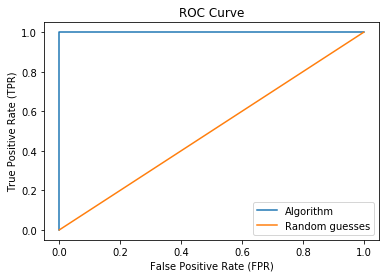

In [78]:
y_true=np.array([-1, -1, -1, +1, +1])
y_pred=np.array([0.3, 0.4, 0.5, 0.6, 0.7]) #how to define the threshold for classes? min+max/2 ? median? mean?


#1. FIND ROC CURVE POINTS & FPR/TPR
pos_label=1
plot=True
y_true=(y_true==pos_label) #boolean vec of true labels

#arrange predictions in descending order (indexes)
descending_scores=np.argsort(y_pred,kind='mergesort')[::-1]
#ascending_scores=np.argsort(y_pred,kind='mergesort')[::1]
y_pred=y_pred[descending_scores]
y_true=y_true[descending_scores]

#determine distinct values to create an index of decreasing values
#'predicted value in y_pred where lower values tend to correspond to label -1 and higher values to label +1'
distinct_values_idx=np.where(np.diff(y_pred))[0]#length n-1 as calculating differences
distinct_descending_scores_idx=np.r_[distinct_values_idx,y_true.size-1]# add last entry

tps=np.cumsum(y_true)[distinct_descending_scores_idx]#cumulative sum of true positives using idx
fps=1-tps+distinct_descending_scores_idx #same as cum sum of false positives

#add 0,0 position for ROC curve
tps=np.r_[0,tps]
fps=np.r_[0,fps]

#false/true positive rate
fpr=fps/fps[-1] #rate=sum/max
tpr=tps/tps[-1]

#2.PLOT ROC CURVE POINTS
if plot==True:
    plt.plot(fpr,tpr,label='Algorithm')
    plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),label='Random guesses')
    plt.ylabel('True Positive Rate (TPR)')
    plt.xlabel('False Positive Rate (FPR)')
    plt.title('ROC Curve')
    plt.legend()

#3. CALCULATE AUC
#reshape needed
fpr=fpr.reshape(1,fpr.shape[0])
tpr=tpr.reshape(1,tpr.shape[0])
    
#assume positive area
end=1
#check if negative area (good discrimination, just switch labels)
diff_fpr=np.diff(fpr)
if np.all(diff_fpr<=0):
    end=-1
#calculate area using trapezoidal approach
area=end*np.trapz(tpr,fpr)
print(area)



In [80]:
def auc(y_true,y_pred,plot=False):
    #1. FIND ROC CURVE POINTS & FPR/TPR
    pos_label=1
    y_true=(y_true==pos_label) #boolean vec of true labels

    #arrange predictions in descending order (indexes)
    descending_scores=np.argsort(y_pred,kind='mergesort')[::-1]
    #ascending_scores=np.argsort(y_pred,kind='mergesort')[::1]
    y_pred=y_pred[descending_scores]
    y_true=y_true[descending_scores]

    #determine distinct values to create an index of decreasing values
    #'predicted value in y_pred where lower values tend to correspond to label -1 and higher values to label +1'
    distinct_values_idx=np.where(np.diff(y_pred))[0]#length n-1 as calculating differences
    distinct_descending_scores_idx=np.r_[distinct_values_idx,y_true.size-1]# add last entry

    tps=np.cumsum(y_true)[distinct_descending_scores_idx]#cumulative sum of true positives using idx
    fps=1-tps+distinct_descending_scores_idx #same as cum sum of false positives

    #add 0,0 position for ROC curve
    tps=np.r_[0,tps]
    fps=np.r_[0,fps]

    #false/true positive rate
    fpr=fps/fps[-1] #rate=sum/max
    tpr=tps/tps[-1]
    
    #2.PLOT ROC CURVE POINTS
    if plot==True:
        plt.plot(fpr,tpr,label='Algorithm')
        plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),label='Random guesses')
        plt.ylabel('True Positive Rate (TPR)')
        plt.xlabel('False Positive Rate (FPR)')
        plt.title('ROC Curve')
        plt.legend()

    #3. CALCULATE AUC
    #reshape needed
    fpr=fpr.reshape(1,fpr.shape[0])
    tpr=tpr.reshape(1,tpr.shape[0])
    
    #assume positive area
    end=1
    #check if negative area (good discrimination, just switch labels)
    diff_fpr=np.diff(fpr)
    if np.all(diff_fpr<=0):
        end=-1
    #calculate area using trapezoidal approach
    area=end*np.trapz(tpr,fpr)

    return area

In [ ]:
def lle(X, m, tol, n_rule, k=None, epsilon=None):
    ''' your header here!
    X=data
    m=number of dimensions for embedding
    n_rule=picks k or epsilon method ('knn'/'eps-ball')
    tol=regularisation parameter
    '''
    n,d=X.shape
    
    'Step 1: Finding the nearest neighbours by rule '
    methods=('knn','eps-ball')
    if n_rule not in methods:
        raise ValueError('Invalid n_rule method, please use one of {0}'
                         ''.format(methods))
    
    if (n_rule=='knn'):
        #nearest neigbours
    
    if (n_rule=='eps-ball'):
        #radius of epsilon ball
        
    'Step 2: local reconstruction weights'
    
    
    
    'Step 3: compute embedding'

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [13]:
from scipy.io import loadmat
usps=loadmat('usps.mat')
usps

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Tue Apr  9 07:01:22 2002',
 '__version__': '1.0',
 '__globals__': [],
 'data_labels': array([[-1, -1, -1, ..., -1,  1, -1],
        [-1, -1, -1, ..., -1, -1,  1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [ 1, -1, -1, ..., -1, -1, -1]], dtype=int16),
 'data_patterns': array([[-0.99999911, -0.99999982, -0.99810815, ..., -0.9999848 ,
         -0.99988925, -0.99999988],
        [-0.999928  , -0.99999666, -0.96389002, ..., -0.99854738,
         -0.99694294, -0.99999988],
        [-0.99788511, -0.99981362, -0.76736605, ..., -0.96670383,
         -0.96289396, -0.99999988],
        ...,
        [-0.99999714, -0.99979782, -0.91768515, ..., -0.99999988,
         -0.99827731, -0.99999487],
        [-0.99999988, -0.99998116, -0.98832631, ..., -0.99999988,
         -0.99992406, -0.99999988],
        [-0.99999988, -0.99999893, -0.9994212

In [68]:
print(usps['data_labels'].shape)
print(usps['data_patterns'].shape)

(10, 2007)
(256, 2007)
(2007,)


In [69]:
df=pd.DataFrame(usps['data_labels'])

In [70]:
df#looks like one hot encoding

,0,1,2,3,4,5,6,7,8,9,...,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
0,-1,-1,-1,-1,-1,1,1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,1,-1
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
3,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,-1,-1
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,1,-1,-1,1,-1,-1
5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
6,-1,1,-1,1,1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
8,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1


In [120]:
one_hot_labels=np.array(usps['data_labels'])
data=np.array(usps['data_patterns'])

In [156]:
labels=[]
for row in one_hot_labels.T:
    labels.append(np.argmax(row,axis=0))
labels=np.hstack(labels)

In [167]:
df=pd.DataFrame(data.T)
df['labels']=labels

In [177]:
df

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,labels
0,-0.999999,-0.999928,-0.997885,-0.973729,-0.855772,-0.597416,-0.289254,0.001891,0.199196,0.292162,...,-0.615748,-0.028963,-0.049759,-0.695397,-0.977106,-0.999538,-0.999997,-1.000000,-1.000000,9
1,-1.000000,-0.999997,-0.999814,-0.996619,-0.978034,-0.954576,-0.975239,-0.995478,-0.999752,-0.999997,...,-0.914037,-0.955923,-0.973471,-0.981216,-0.991076,-0.997891,-0.999798,-0.999981,-0.999999,6
2,-0.998108,-0.963890,-0.767366,-0.287844,0.234189,0.467618,0.504251,0.501694,0.480122,0.345490,...,0.350766,0.191874,0.033329,-0.225809,-0.523583,-0.747106,-0.917685,-0.988326,-0.999421,3
3,-1.000000,-1.000000,-0.999990,-0.999790,-0.997683,-0.992746,-0.992398,-0.997564,-0.999839,-0.999998,...,-0.988119,-0.986757,-0.988421,-0.993128,-0.996551,-0.998991,-0.999889,-0.999993,-1.000000,6
4,-1.000000,-1.000000,-0.999997,-0.999841,-0.997202,-0.976137,-0.854010,-0.519441,-0.095883,0.053946,...,0.470480,0.385176,0.124517,-0.198971,-0.508292,-0.786147,-0.944034,-0.992040,-0.999455,6
5,-1.000000,-1.000000,-0.999970,-0.998548,-0.968473,-0.709550,-0.072981,0.263648,-0.086948,-0.648678,...,0.421207,0.416646,0.184395,-0.014236,-0.291833,-0.572951,-0.858159,-0.979850,-0.998268,0
6,-1.000000,-0.999998,-0.999814,-0.992536,-0.894091,-0.477323,0.078373,-0.024496,-0.530434,-0.822287,...,0.479764,0.403632,0.046277,-0.424436,-0.827054,-0.978393,-0.998868,-0.999977,-1.000000,0
7,-1.000000,-0.999999,-0.999898,-0.994414,-0.919313,-0.686007,-0.491794,-0.350302,0.059211,0.010411,...,0.496278,0.516960,0.493379,0.299296,-0.208491,-0.745022,-0.964174,-0.998060,-0.999966,0
8,-1.000000,-1.000000,-0.999998,-0.999911,-0.998011,-0.976508,-0.832112,-0.413281,0.061916,-0.015121,...,0.462774,0.287686,-0.053804,-0.491264,-0.833878,-0.972264,-0.998035,-0.999943,-0.999999,6
9,-1.000000,-0.999996,-0.999631,-0.989548,-0.887407,-0.555447,-0.120997,0.124533,0.099125,-0.095082,...,-0.172548,-0.630834,-0.950803,-0.997761,-0.999976,-1.000000,-1.000000,-1.000000,-1.000000,9


In [172]:
import numpy as np
import scipy.linalg as la
import scipy.spatial as sp
import matplotlib.pyplot as plt

In [180]:
class PCA():
    """
        Definition of PCA Class
        Algorithms in guide.pdf used, pg 15-17
    """
    def __init__(self, Xtrain):
        """
            Compute Principal Components
        """
        # 1. centre data
        self.Xmean = np.mean(Xtrain, axis = 0)
        self.C = Xtrain - self.Xmean
        # 2. generate covariance marix
        self.C = np.cov(self.C.T)
        # 3. calculate eigenvalues and eigenvectors
        self.D, self.U = np.linalg.eig(self.C)
        # Make a list of (eigenvalue, eigenvector) tuples
        self.pairs = [(np.abs(self.D[i]), self.U[i]) for i in range(len(self.D))]
        # Sort the (eigenvalue, eigenvector) tuples from high to low
        self.pairs.sort(key=lambda x: x[0]) #just based on eigenvalue
        self.pairs.reverse()
        
        self.U = -1*np.array([self.pairs[i][1] for i in range(len(self.pairs))]) # eigencevtors CAVEAT: mulitplying by -1 because numpy.eig routine delivers wrong sign
        self.D = np.array([self.pairs[i][0] for i in range(len(self.pairs))]) # eigenvalues
    def project(self, Xtest, m):
        """
            Projecting to the low-dimensional sub-space
        """
        # 1. centre data by mean of training
        Xtest = Xtest - self.Xmean
        # 2. project data to m principal components
        Z = self.U.T[range(m)].dot(Xtest.T).T    
        return Z
    def denoise(self, Xtest, m):
        """
            Reconstructing projected data points in the original space
        """
        # 1. projection to the low-dimencsional sub-space
        Z = self.project(Xtest, m)
        # 2. recontraction by m dimensions
        Y = Z.dot(self.U.T[range(m)])+self.Xmean
        return Y

In [181]:
from scipy.io import loadmat
usps=loadmat('usps.mat')
data=np.array(usps['data_patterns'])
usps_pca=PCA(data)


In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

In [3]:
def lle(X, m, tol, n_rule, k=None, epsilon=None):
    """
        Locally Linear Embedding
    """
    
    # compute neighborhoord by kNN or eps-bole rule
    
    # 1. calculate euclidean distance of data
    D = sp.distance_matrix(X, X)
    
    # 2. check for applied rule
    if n_rule == 'knn':
        # check if k is provided
        assert (k != None), """The parameter 'k' is required for the 'knn' rule"""
        # 3a. calculate k nearest neighbors
        # Sort distance matrix
        kn = np.argsort(D,kind='mergesort')
        # identify k-nearest neighbors
        kn = kn[:,1:k+1]
        
    elif n_rule == 'eps-ball':
        # check if epsilon is provided
        assert (epsilon != None), """The parameter 'epsilon' is required for the 'eps-ball' rule"""
        # 3b. compare distance by epsilon
        # tupel (1. element, 2. element)
        idx = np.argwhere(D<epsilon)
        # row wise all points in the neighborhood
        kn = [idx[:,1][idx[:,0]==i] for i in np.unique(idx[:,0])]
    else:
        print("""The following rule {} is not known. Please use either 'knn' or 'eps-ball'.""".format(n_rule))
    
    # 4. calculate reconstruction weights 
    # intialize weight matrix
    W = np.zeros((len(X),len(X)))
    # calculate weights for every point
    for i in range(len(X)):
        # calculate covariance matrix
        C = np.cov(X[kn[i]])
        # solve for weights 
        I = np.eye(len(X[kn[i]]))
        weights = np.linalg.inv(C-3*I).dot(np.ones(len(X[kn[i]])).reshape(len(X[kn[i]]),1))
        # normalize weights
        weights = (1/(weights.T.dot(np.ones(len(X[kn[i]])).reshape(len(X[kn[i]]),1)))*weights).reshape(len(X[kn[i]]))
        W[i,kn[i]] = weights
    
    # 5. calculate cost matrix
    I = np.eye(len(X))
    M = (I - W).T@(I-W)
    
    # 6. Obtain eigenvalues and eigenvector of M
    eigen_values, eigen_vector = np.linalg.eig(M)
    # sort eigenvalues in ascending order
    eigen_kn = np.argsort(abs(eigen_values),kind='mergesort').reshape(len(X),1)
    # sort eigenvectors by eigenvalues, eigenvector along columns, first eigenvector -> [:,0]
    V = -1*np.take_along_axis(eigen_vector.T, eigen_kn, axis = 0).T # CAVEAT: mulitplying by -1 because numpy.eig routine delivers wrong sign
    
    # 7. embedded dimension 
    Y = V[:,1:m+1]
    
    # 8. Check connected graphs
    return Y

In [212]:
from scipy.sparse.csgraph import connected_components
X=np.array([[100,203,46,844],[1,1,1,1],[-50,-100,-590,-80]])
k=2
n_rule='knn'
m=2

# compute neighborhoord by kNN or eps-bole rule
    
    # 1. calculate euclidean distance of data
D = sp.distance_matrix(X, X)
    
    # 2. check for applied rule
if n_rule == 'knn':
        # check if k is provided
    assert (k != None), """The parameter 'k' is required for the 'knn' rule"""
        # 3a. calculate k nearest neighbors
        # Sort distance matrix
    kn = np.argsort(D,kind='mergesort')
        # identify k-nearest neighbors
    kn = kn[:,1:k+1]
        
elif n_rule == 'eps-ball':
        # check if epsilon is provided
    assert (epsilon != None), """The parameter 'epsilon' is required for the 'eps-ball' rule"""
        # 3b. compare distance by epsilon
        # tupel (1. element, 2. element)
    idx = np.argwhere(D<epsilon)
        # row wise all points in the neighborhood
    kn = [idx[:,1][idx[:,0]==i] for i in np.unique(idx[:,0])]
else:
    print("""The following rule {} is not known. Please use either 'knn' or 'eps-ball'.""".format(n_rule))
    
    # 4. calculate reconstruction weights 
    # intialize weight matrix
W = np.zeros((len(X),len(X)))
    # calculate weights for every point
for i in range(len(X)):
        # calculate covariance matrix
    C = np.cov(X[kn[i]])
        # solve for weights 
    I = np.eye(len(X[kn[i]]))
    weights = np.linalg.inv(C-3*I).dot(np.ones(len(X[kn[i]])).reshape(len(X[kn[i]]),1))
        # normalize weights
    weights = (1/(weights.T.dot(np.ones(len(X[kn[i]])).reshape(len(X[kn[i]]),1)))*weights).reshape(len(X[kn[i]]))
    W[i,kn[i]] = weights
    
    # 5. calculate cost matrix
I = np.eye(len(X))
M = (I - W).T@(I-W)
    
    # 6. Obtain eigenvalues and eigenvector of M
eigen_values, eigen_vector = np.linalg.eig(M)
    # sort eigenvalues in ascending order
eigen_kn = np.argsort(abs(eigen_values),kind='mergesort').reshape(len(X),1)
    # sort eigenvectors by eigenvalues, eigenvector along columns, first eigenvector -> [:,0]
V = -1*np.take_along_axis(eigen_vector.T, eigen_kn, axis = 0).T # CAVEAT: mulitplying by -1 because numpy.eig routine delivers wrong sign
print(V)

    # 7. embedded dimension 
Y = V[:,1:m+1]

#8. Check connected graph
#if (connected_components(V,directed=False)!=0):
#    raise ValueError('Graphs are not connected!')
print(connected_components(V,directed=False)[0])
print(Y)
print(Z)

[[-0.57735027 -0.75963213  0.29937552]
 [-0.57735027  0.12054926 -0.80754848]
 [-0.57735027  0.63908287  0.50817296]]
1
[[-0.75963213  0.29937552]
 [ 0.12054926 -0.80754848]
 [ 0.63908287  0.50817296]]
(1, array([0, 0, 0]))


In [233]:
from scipy.sparse.csgraph import connected_components
X=np.array([[100,203,46,844],[1,1,1,1],[-50,-100,-590,-80]])
epsilon=900
n_rule='eps-ball'
k=2
m=2

D = sp.distance_matrix(X, X)

    # 2. check for applied rule
if n_rule == 'knn':
        # check if k is provided
    assert (k != None), """The parameter 'k' is required for the 'knn' rule"""
        # 3a. calculate k nearest neighbors
        # Sort distance matrix
    kn = np.argsort(D,kind='mergesort')
        # identify k-nearest neighbors
    kn = kn[:,1:k+1]

if n_rule == 'eps-ball':
        # check if epsilon is provided
    assert (epsilon != None), """The parameter 'epsilon' is required for the 'eps-ball' rule"""
        # 3b. compare distance by epsilon
        # tupel (1. element, 2. element)
    idx = np.argwhere(D<epsilon)
        # row wise all points in the neighborhood
    kn = [idx[:,1][idx[:,0]==i] for i in np.unique(idx[:,0])]
else:
    print("""The following rule {} is not known. Please use either 'knn' or 'eps-ball'.""".format(n_rule))
    
print(D)
print(idx.shape)
print(idx)
print(kn)
print(idx[:,1],'ahhaha')
for i in np.unique(idx[:,0]):
    print(idx[:,1][idx[:,0]==i])
#print(D[D<epsilon])

[[   0.          873.65840006 1171.57202083]
 [ 873.65840006    0.          607.16060478]
 [1171.57202083  607.16060478    0.        ]]
(7, 2)
[[0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 2]
 [2 1]
 [2 2]]
[array([0, 1], dtype=int64), array([0, 1, 2], dtype=int64), array([1, 2], dtype=int64)]
[0 1 0 1 2 1 2] ahhaha
[0 1]
[0 1 2]
[1 2]


In [ ]:
#ASSIGNMENT 6

In [294]:
def gammaidx(X, k):
    """
    Gamma identification for outlier detection by ranking
    """
    y = []
    # Calculate distance matrix
    D = sp.distance_matrix(X, X)
    # Sort distance matrix
    kn = np.argsort(D,kind='mergesort')
    # identify k-nearest neighbours
    kn = kn[:,1:k+1]
    # sum over k-neaest neighbours and divide bei k
    y = np.sum(np.take_along_axis(D, kn, axis = 1),axis = 1)/k
    
    return y

In [295]:
def auc(y_true,y_pred,plot=False):
    #1. FIND ROC CURVE POINTS & FPR/TPR
    pos_label=1
    y_true=(y_true==pos_label) #boolean vec of true labels

    #arrange predictions in descending order (indexes)
    descending_scores=np.argsort(y_pred,kind='mergesort')[::-1]
    #ascending_scores=np.argsort(y_pred,kind='mergesort')[::1]
    y_pred=y_pred[descending_scores]
    y_true=y_true[descending_scores]

    #determine distinct values to create an index of decreasing values
    #'predicted value in y_pred where lower values tend to correspond to label -1 and higher values to label +1'
    distinct_values_idx=np.where(np.diff(y_pred))[0]#length n-1 as calculating differences
    distinct_descending_scores_idx=np.r_[distinct_values_idx,y_true.size-1]# add last entry

    tps=np.cumsum(y_true)[distinct_descending_scores_idx]#cumulative sum of true positives using idx
    fps=1-tps+distinct_descending_scores_idx #same as cum sum of false positives

    #add 0,0 position for ROC curve
    tps=np.r_[0,tps]
    fps=np.r_[0,fps]

    #false/true positive rate
    fpr=fps/fps[-1] #rate=sum/max
    tpr=tps/tps[-1]
    
    #2.PLOT ROC CURVE POINTS
    if plot==True:
        plt.plot(fpr,tpr,label='Algorithm')
        plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),label='Random guesses')
        plt.ylabel('True Positive Rate (TPR)')
        plt.xlabel('False Positive Rate (FPR)')
        plt.title('ROC Curve')
        plt.legend()

    #3. CALCULATE AUC
    #reshape needed
    fpr=fpr.reshape(1,fpr.shape[0])
    tpr=tpr.reshape(1,tpr.shape[0])
    
    #assume positive area
    end=1
    #check if negative area (good discrimination, just switch labels)
    diff_fpr=np.diff(fpr)
    if np.all(diff_fpr<=0):
        end=-1
    #calculate area using trapezoidal approach
    area=end*np.trapz(tpr,fpr)

    return area

In [382]:
data = np.load('banana.npz')
lst = data.files
for item in lst:
    print(item)
    print(data[item])

data
[[-3.0898387  -2.9808342  -2.8360574  ...  2.7103145   2.7544469
   2.8133603 ]
 [-0.83168647 -0.15957534 -0.17708113 ...  1.3465977   1.4719528
   1.3016674 ]]
label
[[-1. -1. -1. ...  1.  1.  1.]]


In [383]:
print(data['data'].shape)
print(data['label'].shape)
print(np.shape(np.argwhere(data['label']==1)))
print(np.argwhere(data['label']==1).T[1])

(2, 5300)
(1, 5300)
(2376, 2)
[  10   11   13 ... 5297 5298 5299]


In [384]:
outlier_rate=np.array([0.01,0.1,0.5,1])
pos_idx=np.argwhere(data['label']==1).T[1]#idx of pos class
n_outliers=np.round(outlier_rate*len(pos_idx))
pos_data=data['data'].T[pos_idx]


x=np.random.uniform(low=-4,high=4,size=(1,2))
print(pos_data.shape)

(2376, 2)


In [385]:
#int(n_outliers)
n_outliers=n_outliers.astype(int)
n_outliers

array([  24,  238, 1188, 2376])

In [425]:
loops=50

results_3=np.empty((loops,len(n_outliers)))
results_10=np.empty((loops,len(n_outliers)))
results_mean=np.empty((loops,len(n_outliers)))

for i in range(loops):
    
    
    for j in n_outliers:
        
        #draw outliers from uniform box
        outliers=np.random.uniform(low=-4,high=4,size=(j,2))
        print(outliers[0][0])
        
        #reset data
        data_=data['data'].T
        labels_=data['label'].T
        #print(data_.shape)
        #print(labels_.shape)
        
        #add outliers to positive class
        data_=np.append(data_,outliers,axis=0)
        labels_=np.append(labels_,np.ones((j,1)),axis=0)
        
        #print(data_.shape)
        #print(labels_.shape)
        
        #compute gamma 3,10,mean
        gamma_3=gammaidx(data_,3)
        gamma_10=gammaidx(data_,10)
        #compute dist_to_mean
        diff=np.subtract(data_,np.mean(data_,axis=0))
        dist_to_mean=np.linalg.norm(diff,axis=1)
        
        #print("gamma_3",gamma_3)
        #print("gamma10",gamma_10)
        #print("dist_to_mean",dist_to_mean)
        
        #compute auc
        auc_3=auc(labels_,gamma_3)
        auc_10=auc(labels_,gamma_10)
        auc_mean=auc(labels_,dist_to_mean)
        
        #print("auc 3",auc_3)
        #print("auc 10",auc_10)
        #print("auc mean",auc_mean)
        
        #store results
        results_3[i][np.argwhere(n_outliers==j)]=auc_3[0]
        results_10[i][np.argwhere(n_outliers==j)]=auc_10[0]
        results_mean[i][np.argwhere(n_outliers==j)]=auc_mean[0]
        
        
        

2.781771907534286
(5300, 2)
(5300, 1)
(5324, 2)
(5324, 1)
gamma_3 [0.68171985 0.19525758 0.16027405 ... 0.77506326 0.61189473 1.51987424]
gamma10 [0.86875389 0.50198027 0.42387103 ... 1.17675596 0.78400285 1.61758652]
dist_to_mean [3.20142231 2.98683305 2.84330735 ... 4.24211876 3.39876281 3.50699366]
auc 3 [0.62785682]
auc 10 [0.68384405]
auc mean [0.42121438]
-1.4778549377465549
(5300, 2)
(5300, 1)
(5538, 2)
(5538, 1)
gamma_3 [0.47073957 0.21583046 0.19898362 ... 0.32984871 0.01528181 0.22228395]
gamma10 [0.59534247 0.36698846 0.35633522 ... 0.51343735 0.03066245 0.37761893]
dist_to_mean [3.20363155 2.98812006 2.84463502 ... 3.39072017 1.48501058 2.99057858]
auc 3 [0.64850139]
auc 10 [0.70135344]
auc mean [0.4596998]
0.08145522912043024
(5300, 2)
(5300, 1)
(6488, 2)
(6488, 1)
gamma_3 [0.19847739 0.1571374  0.23932305 ... 0.16806066 0.08627557 0.03228212]
gamma10 [0.32027396 0.28957934 0.29770854 ... 0.25686973 0.10315115 0.04485146]
dist_to_mean [3.18584898 2.96699758 2.82363908 ... 

gamma_3 [0.17290491 0.15145343 0.13152532 ... 0.16604023 0.12286608 0.17043434]
gamma10 [0.25486817 0.19636993 0.20700674 ... 0.24607416 0.19485694 0.24944199]
dist_to_mean [3.21100003 2.99820333 2.85461182 ... 3.68689121 2.75426317 3.9707925 ]
auc 3 [0.76049058]
auc 10 [0.79926841]
auc mean [0.66004328]
-1.3893250817536886
(5300, 2)
(5300, 1)
(5324, 2)
(5324, 1)
gamma_3 [0.58753615 0.21149723 0.23199702 ... 0.09648768 0.03585089 1.39167194]
gamma10 [0.82101367 0.50685217 0.44538792 ... 0.17266185 0.05464254 1.61806534]
dist_to_mean [3.20111907 2.98620222 2.84268995 ... 2.09252868 0.27777822 4.16601793]
auc 3 [0.62742847]
auc 10 [0.68382253]
auc mean [0.42038688]
-1.013380817325828
(5300, 2)
(5300, 1)
(5538, 2)
(5538, 1)
gamma_3 [0.35185222 0.24101183 0.1903746  ... 0.32752591 0.35481669 0.03648302]
gamma10 [0.59169717 0.4047078  0.36948114 ... 0.59595732 0.57048048 0.0613127 ]
dist_to_mean [3.19320261 2.97848837 2.83496053 ... 3.26853768 2.71439927 1.46582108]
auc 3 [0.65180191]
auc 1

gamma_3 [0.21194365 0.14245723 0.04683131 ... 0.10245907 0.14725228 0.02993792]
gamma10 [0.32332976 0.25804839 0.21725416 ... 0.20510366 0.31766434 0.06317326]
dist_to_mean [3.20663815 2.99189459 2.84837999 ... 2.74158066 3.55850819 2.20476881]
auc 3 [0.71963498]
auc 10 [0.7613931]
auc mean [0.57599987]
1.6672578953209278
(5300, 2)
(5300, 1)
(7676, 2)
(7676, 1)
gamma_3 [0.18473015 0.12956593 0.12151183 ... 0.13807929 0.11806439 0.14318481]
gamma10 [0.22876077 0.20409017 0.2077855  ... 0.22682137 0.16114741 0.26039481]
dist_to_mean [3.19759295 2.98405327 2.84048057 ... 2.18445823 4.32736654 5.32679202]
auc 3 [0.76207836]
auc 10 [0.80118552]
auc mean [0.66048754]
-1.1449697036367414
(5300, 2)
(5300, 1)
(5324, 2)
(5324, 1)
gamma_3 [0.72279004 0.30161886 0.23945279 ... 0.47023445 0.02408815 0.81795474]
gamma10 [0.88107495 0.57132699 0.48874785 ... 0.72109094 0.05556227 1.08804416]
dist_to_mean [3.20377677 2.98888913 2.84537801 ... 3.10627506 1.7978876  3.03398756]
auc 3 [0.62731518]
auc 10

gamma_3 [0.29345874 0.20733491 0.20918575 ... 0.31825626 0.29278936 0.56203976]
gamma10 [0.54182457 0.36699942 0.34679194 ... 0.66569143 0.58156285 0.81935712]
dist_to_mean [3.20148864 2.98679294 2.84327174 ... 2.77405931 2.58180681 4.71195449]
auc 3 [0.65152624]
auc 10 [0.70365139]
auc mean [0.45888379]
2.0360065211526415
(5300, 2)
(5300, 1)
(6488, 2)
(6488, 1)
gamma_3 [0.09106784 0.04283599 0.12690641 ... 0.22018143 0.10553831 0.22094118]
gamma10 [0.24092492 0.19656727 0.19185798 ... 0.31972389 0.21385664 0.2838444 ]
dist_to_mean [3.20907022 2.9948087  2.85127613 ... 4.04829241 3.6344384  3.29480404]
auc 3 [0.71903984]
auc 10 [0.76342963]
auc mean [0.57843099]
2.018415849732775
(5300, 2)
(5300, 1)
(7676, 2)
(7676, 1)
gamma_3 [0.14338571 0.09969978 0.18727047 ... 0.13713    0.09768739 0.13034996]
gamma10 [0.1995853  0.21912582 0.23803406 ... 0.24074771 0.227884   0.18929326]
dist_to_mean [3.19350548 2.97775972 2.83427543 ... 3.58939064 4.03973441 3.67020807]
auc 3 [0.76396676]
auc 10 

gamma_3 [0.62520957 0.30161886 0.23945279 ... 1.24467544 1.59992642 0.50173077]
gamma10 [0.82011296 0.5620179  0.48874785 ... 1.48107008 1.87142938 0.96363424]
dist_to_mean [3.19806073 2.98356632 2.84003367 ... 3.28752456 3.90776545 3.5888362 ]
auc 3 [0.62795443]
auc 10 [0.68382567]
auc mean [0.42077192]
1.567234370752419
(5300, 2)
(5300, 1)
(5538, 2)
(5538, 1)
gamma_3 [0.51919324 0.18163902 0.21317618 ... 0.35835131 0.63180933 0.35378148]
gamma10 [0.76822053 0.40472472 0.3988282  ... 0.65575588 1.08786799 0.4102448 ]
dist_to_mean [3.20371748 2.98867884 2.84517399 ... 4.20671977 5.03244459 2.6722664 ]
auc 3 [0.65193457]
auc 10 [0.70489836]
auc mean [0.46216155]
-2.784357672961729
(5300, 2)
(5300, 1)
(6488, 2)
(6488, 1)
gamma_3 [0.26187145 0.15330938 0.09029536 ... 0.07053861 0.23088852 0.13319068]
gamma10 [0.33730246 0.26480802 0.20059399 ... 0.25889188 0.33116819 0.18758706]
dist_to_mean [3.21245386 2.99748606 2.85398604 ... 4.32136847 3.91325554 2.27421669]
auc 3 [0.7171437]
auc 10 [

gamma_3 [0.17259903 0.15137767 0.11252492 ... 0.06566321 0.12096309 0.14403514]
gamma10 [0.20878852 0.19854529 0.20370306 ... 0.20907578 0.21650921 0.19336023]
dist_to_mean [3.19349258 2.98007174 2.83649051 ... 3.43841621 3.8740854  2.09397096]
auc 3 [0.76506479]
auc 10 [0.80523177]
auc mean [0.65896554]
-1.4047247700260295
(5300, 2)
(5300, 1)
(5324, 2)
(5324, 1)
gamma_3 [0.70762759 0.30161886 0.23945279 ... 1.13579523 1.33033648 0.07879562]
gamma10 [0.87209095 0.56159757 0.48874785 ... 1.45659624 1.784756   0.11377943]
dist_to_mean [3.20145899 2.98690162 2.84337462 ... 3.82020312 3.97598642 1.67603421]
auc 3 [0.62786693]
auc 10 [0.68390561]
auc mean [0.4208872]
2.829840430999135
(5300, 2)
(5300, 1)
(5538, 2)
(5538, 1)
gamma_3 [0.4182818  0.14895684 0.14021169 ... 0.31873513 0.13808933 0.37738717]
gamma10 [0.58868588 0.41624686 0.37127426 ... 0.54555511 0.39260861 0.72621027]
dist_to_mean [3.20677839 2.99081079 2.84734785 ... 3.7547689  2.8492897  3.74701644]
auc 3 [0.65206044]
auc 10 

gamma_3 [0.14586465 0.058318   0.12766696 ... 0.02906244 0.10132296 0.2237192 ]
gamma10 [0.30576373 0.19811163 0.21303285 ... 0.06215706 0.21268029 0.32462839]
dist_to_mean [3.20811499 2.99646417 2.85282333 ... 1.62241489 2.20108642 3.20403573]
auc 3 [0.71694017]
auc 10 [0.75724019]
auc mean [0.57315373]
3.359248166974531
(5300, 2)
(5300, 1)
(7676, 2)
(7676, 1)
gamma_3 [0.05666784 0.10241804 0.16069415 ... 0.20620283 0.07899857 0.09241488]
gamma10 [0.13420464 0.20651564 0.21817507 ... 0.30583229 0.14724943 0.15837548]
dist_to_mean [3.21162335 3.00163413 2.85792934 ... 3.96100023 2.87116693 2.6142565 ]
auc 3 [0.7597457]
auc 10 [0.79710969]
auc mean [0.65619034]
3.0736483194847946
(5300, 2)
(5300, 1)
(5324, 2)
(5324, 1)
gamma_3 [0.71253231 0.30161886 0.23945279 ... 0.34745955 1.163303   1.5946503 ]
gamma10 [0.85964803 0.56083561 0.47533572 ... 0.39212999 1.69172838 2.48785956]
dist_to_mean [3.20154835 2.98684781 2.84332687 ... 2.22053185 4.49450335 4.81304533]
auc 3 [0.62691119]
auc 10 [

gamma_3 [0.32031852 0.30161886 0.23945279 ... 0.04111955 0.27052664 0.67014954]
gamma10 [0.66455054 0.4995251  0.45600517 ... 0.08091868 0.7518412  0.76863531]
dist_to_mean [3.20062164 2.98802074 2.84441211 ... 1.69399996 3.72749564 3.12511598]
auc 3 [0.65362297]
auc 10 [0.70548449]
auc mean [0.46221689]
-1.669985619144554
(5300, 2)
(5300, 1)
(6488, 2)
(6488, 1)
gamma_3 [0.16985907 0.13699976 0.11424867 ... 0.30505056 0.27304848 0.23245078]
gamma10 [0.3052494  0.26181184 0.23496127 ... 0.39220419 0.40437047 0.31429041]
dist_to_mean [3.17069781 2.95422633 2.81075188 ... 4.47548876 4.50294269 3.83670682]
auc 3 [0.71880378]
auc 10 [0.76047093]
auc mean [0.56971207]
0.6939938617935182
(5300, 2)
(5300, 1)
(7676, 2)
(7676, 1)
gamma_3 [0.14292719 0.11844913 0.10983313 ... 0.07319522 0.0441564  0.14169227]
gamma10 [0.20435649 0.18826526 0.19265984 ... 0.26221319 0.06337921 0.20665403]
dist_to_mean [3.19335372 2.97688315 2.83342939 ... 4.3324409  1.6283115  4.46303681]
auc 3 [0.76297287]
auc 10

gamma_3 [0.61611092 0.30161886 0.23945279 ... 0.03093278 0.28255518 0.06608504]
gamma10 [0.80406312 0.56748956 0.48749016 ... 0.06754106 0.34259832 0.12786189]
dist_to_mean [3.19601971 2.98177714 2.83823218 ... 0.32067329 1.98989909 2.57192702]
auc 3 [0.62712281]
auc 10 [0.68369414]
auc mean [0.41925373]
-2.2034444072851054
(5300, 2)
(5300, 1)
(5538, 2)
(5538, 1)
gamma_3 [0.33057461 0.26086421 0.23945279 ... 0.04285933 0.03504487 0.02891792]
gamma10 [0.56476067 0.45588646 0.44004526 ... 0.14367826 0.06171836 0.06627155]
dist_to_mean [3.19586271 2.98292349 2.83932455 ... 2.08780918 2.04917423 1.90335522]
auc 3 [0.64944456]
auc 10 [0.70373002]
auc mean [0.45958519]
-2.715670628340761
(5300, 2)
(5300, 1)
(6488, 2)
(6488, 1)
gamma_3 [0.14674217 0.10516994 0.09896082 ... 0.1656238  0.19099747 0.14432973]
gamma10 [0.29848238 0.16733378 0.18206886 ... 0.24472643 0.2579003  0.26617218]
dist_to_mean [3.20935691 2.99861169 2.8549353  ... 3.3660799  3.78160079 2.39082254]
auc 3 [0.71966761]
auc 1

In [427]:
results_mean.shape

(50, 4)

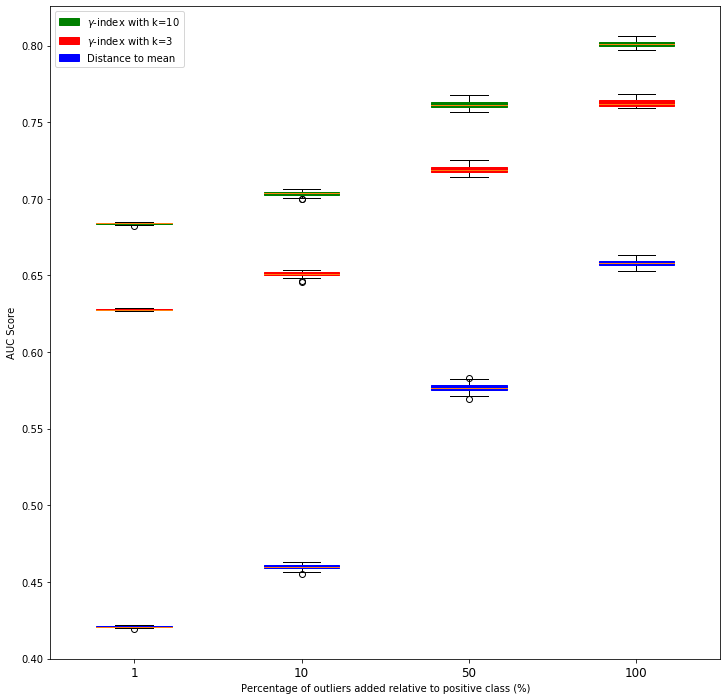

In [452]:
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlabel('Percentage of outliers added relative to positive class (%)')
ax.set_ylabel('AUC Score')
bp1=ax.boxplot(results_10,patch_artist=True,boxprops=dict(facecolor='green', color='green'))
bp2=ax.boxplot(results_3,patch_artist=True,boxprops=dict(facecolor='red', color='red'))
bp3=ax.boxplot(results_mean,patch_artist=True,boxprops=dict(facecolor='blue', color='blue'))
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['1', '10', '50', '100'], fontsize=12)
ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]], ['$\gamma$-index with k=10', '$\gamma$-index with k=3','Distance to mean'], loc='upper left')


In [370]:
results_3

array([[0.62728625, 0.65076754, 0.72439358, 0.76297502],
       [0.62796369, 0.64833301, 0.71975397, 0.76259524]])

In [458]:
n_outliers=np.array([1188])#50% contamination

#draw outliers from uniform box
outliers=np.random.uniform(low=-4,high=4,size=(n_outliers[0],2))
        
#pos data
pos=data['data'].T
        
#add outliers to positive class
data_=np.append(pos,outliers,axis=0)
        
#compute gamma 3,10,mean
gamma_3=gammaidx(data_,3)
gamma_10=gammaidx(data_,10)
#compute dist_to_mean
diff=np.subtract(data_,np.mean(data_,axis=0))
dist_to_mean=np.linalg.norm(diff,axis=1)
        

        

In [505]:
np.mean(gamma_3[5300:])

0.13973263608325392

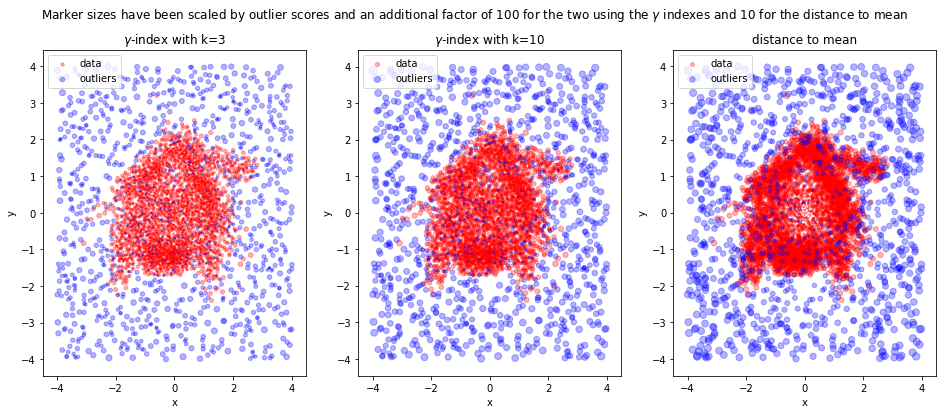

In [525]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16,6))
fig.suptitle('Marker sizes have been scaled by outlier scores and an additional factor of 100 for the two using the $\gamma$ indexes and 10 for the distance to mean', fontsize=12)

axes[0].scatter(x=pos.T[0],y=pos.T[1],s=gamma_3[:5300]*100,c='r',label='data',alpha=0.3,edgecolors=None,)
axes[0].scatter(x=outliers.T[0],y=outliers.T[1],s=gamma_3[5300:]*100,c='b',label='outliers',alpha=0.3,edgecolors=None)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('$\gamma$-index with k=3')
axes[0].legend()

axes[1].scatter(x=pos.T[0],y=pos.T[1],s=gamma_10[:5300]*100,c='r',label='data',alpha=0.3,edgecolors=None,)
axes[1].scatter(x=outliers.T[0],y=outliers.T[1],s=gamma_10[5300:]*100,c='b',label='outliers',alpha=0.3,edgecolors=None)
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('$\gamma$-index with k=10')
axes[1].legend()

axes[2].scatter(x=pos.T[0],y=pos.T[1],s=dist_to_mean[:5300]*10,c='r',label='data',alpha=0.3,edgecolors=None,)
axes[2].scatter(x=outliers.T[0],y=outliers.T[1],s=dist_to_mean[5300:]*10,c='b',label='outliers',alpha=0.3,edgecolors=None)
axes[2].set_xlabel('x')
axes[2].set_ylabel('y')
axes[2].set_title('distance to mean')
axes[2].legend()


In [316]:
results_3[np.argwhere(n_outliers==j)].reshape(1,loops)

(1,)

In [355]:
auc_3[0]

0.31221708938449705

In [349]:
for i in range(4):
    print(i)

0
1
2
3


In [328]:
np.shape([auc_3])

(1, 1)

In [343]:
a = np.empty((5,4))
print(a)
np.append(a[0], [1],axis=0)

#np.insert(a, 1, 5, axis=1)

[[0.0e+000 4.9e-324 9.9e-324 1.5e-323]
 [2.0e-323 2.5e-323 3.0e-323 3.5e-323]
 [4.0e-323 4.4e-323 4.9e-323 5.4e-323]
 [5.9e-323 6.4e-323 6.9e-323 7.4e-323]
 [7.9e-323 8.4e-323 8.9e-323 0.0e+000]]


array([0.0e+000, 4.9e-324, 9.9e-324, 1.5e-323, 1.0e+000])

In [362]:
a=np.zeros((5,2))
for i in range(5):
    x=np.random.uniform(low=-4,high=4,size=(1,2))
    a[i]=x
print(a)

[[ 1.59556333 -2.48078407]
 [ 2.88135629 -1.38495358]
 [ 1.39848797 -2.96993869]
 [-2.43455271 -3.14427666]
 [ 0.47030137 -0.63959023]]


In [417]:
X=np.array([[2,3],[0,1]])
print(X)
print(np.linalg.norm(X,axis=1))

[[2 3]
 [0 1]]
[3.60555128 1.        ]


In [ ]:
#ASSIGNMENT 7

In [188]:
from scipy.sparse.csgraph import connected_components

def lle(X, m, tol, n_rule, k=None, epsilon=None):
    """
        Locally Linear Embedding
    """
    
    # compute neighborhoord by kNN or eps-bole rule
    
    # 1. calculate euclidean distance of data
    D = sp.distance_matrix(X, X)
    
    # 2. check for applied rule
    if n_rule == 'knn':
        # check if k is provided
        assert (k != None), """The parameter 'k' is required for the 'knn' rule"""
        # 3a. calculate k nearest neighbors
        # Sort distance matrix
        kn = np.argsort(D,kind='mergesort')
        # identify k-nearest neighbors
        kn = kn[:,1:k+1]
        
    elif n_rule == 'eps-ball':
        # check if epsilon is provided
        assert (epsilon != None), """The parameter 'epsilon' is required for the 'eps-ball' rule"""
        # 3b. compare distance by epsilon
        # tupel (1. element, 2. element)
        idx = np.argwhere(D<epsilon) #CHECK
        # row wise all points in the neighborhood
        kn = [idx[:,1][idx[:,0]==i] for i in np.unique(idx[:,0])]
    else:
        print("""The following rule {} is not known. Please use either 'knn' or 'eps-ball'.""".format(n_rule))
    
    # 4. calculate reconstruction weights 
    # intialize weight matrix
    W = np.zeros((len(X),len(X)))
    # calculate weights for every point
    for i in range(len(X)):
        # calculate covariance matrix
        C = np.cov(X[kn[i]])
        # solve for weights 
        I = np.eye(len(X[kn[i]]))
        weights = np.linalg.inv(C-3*I).dot(np.ones(len(X[kn[i]])).reshape(len(X[kn[i]]),1))
        # normalize weights
        weights = (1/(weights.T.dot(np.ones(len(X[kn[i]])).reshape(len(X[kn[i]]),1)))*weights).reshape(len(X[kn[i]]))
        W[i,kn[i]] = weights
    
    # 5. calculate cost matrix
    I = np.eye(len(X))
    M = (I - W).T@(I-W)
    
    # 6. Obtain eigenvalues and eigenvector of M
    eigen_values, eigen_vector = np.linalg.eigh(M)
    # sort eigenvalues in ascending order
    eigen_kn = np.argsort(abs(eigen_values),kind='mergesort').reshape(len(X),1)
    # sort eigenvectors by eigenvalues, eigenvector along columns, first eigenvector -> [:,0]
    V = -1*np.take_along_axis(eigen_vector.T, eigen_kn, axis = 0).T # CAVEAT: mulitplying by -1 because numpy.eig routine delivers wrong sign
    
    # 7. embedded dimension 
    Y = V[:,1:m+1]
    
    #8. Check connected graph
    if (connected_components(V,directed=False)[0]!=1):
        raise ValueError('Graphs are not connected!')
    
    return Y

In [10]:
fishbowl = np.load('fishbowl_dense.npz')
swissroll = np.load('swissroll_data.npz')
flatroll = np.load('flatroll_data.npz')

In [11]:
lst = swissroll.files
for item in lst:
    print(item)
    print(swissroll[item])

el
[[13]]
noise
[[0]]
e
[[-0.43256481  0.28767642  1.1891642  ...  1.04768883  0.66001034
   0.85957298]
 [-1.66558438 -1.14647135 -0.03763328 ...  0.8633273   1.29411577
   0.12867004]
 [ 0.12533231  1.19091547  0.32729236 ... -0.6424113   0.31457906
   0.01656787]]
name
['classic swiss roll']
distances
[[ 0.         21.60802636 12.90216648 ...  5.55571702 22.7527932
  20.05344852]
 [21.60802636  0.         20.70207456 ... 22.88636566 16.42299685
  18.70850426]
 [12.90216648 20.70207456  0.         ... 16.08956392 12.71785254
   8.74591981]
 ...
 [ 5.55571702 22.88636566 16.08956392 ...  0.         24.59041972
  22.1352497 ]
 [22.7527932  16.42299685 12.71785254 ... 24.59041972  0.
   4.5782703 ]
 [20.05344852 18.70850426  8.74591981 ... 22.1352497   4.5782703
   0.        ]]
z
[[12.0963502   8.86094926 11.54188751  7.44369904 10.88317279  8.94190588
  11.82947522  4.80286193 11.95818686  7.00829826  3.68720535 10.80550634
   4.45060838  5.01450095  5.70690341  3.28554602  7.3365277  

In [12]:
#format data and references
fishbowl_data=fishbowl['X'].T
fishbowl_ref=fishbowl['X'].T[:,2]
swissroll_data=swissroll['x_noisefree'].T
swissroll_ref=swissroll['z'].T[:,0]
flatroll_data=flatroll['Xflat'].T
flatroll_ref=flatroll['true_embedding'].T

In [13]:
swissroll_data.shape

(400, 3)

In [212]:
#apply lle
from scipy.sparse.csgraph import connected_components

fishbowl_lle=lle(fishbowl_data,2,0.00001,'knn',k=9)


In [213]:
fishbowl_lle #returning complex values -- is this right?

array([[-0.00438282,  0.03324385],
       [-0.01757356,  0.01989907],
       [ 0.00134401, -0.03557852],
       ...,
       [ 0.001785  , -0.01112289],
       [ 0.03600529, -0.01820708],
       [-0.03699088,  0.00158274]])

Text(0.5, 1.0, 'Fishbowl in 2D')

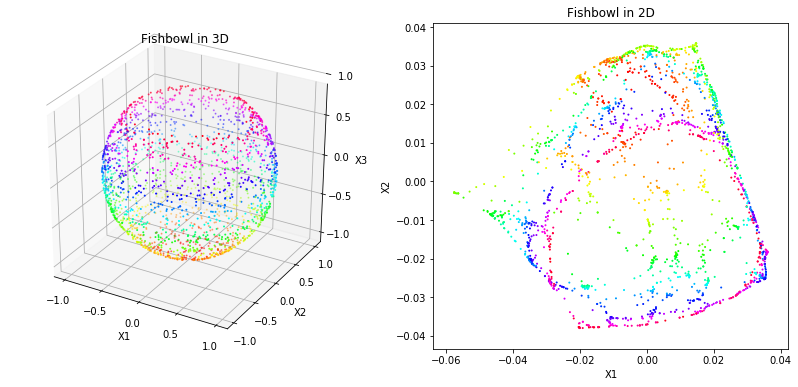

In [214]:
#plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(xs=fishbowl_data.T[0],ys=fishbowl_data.T[1],zs=fishbowl_data.T[2],s=1, c=fishbowl_ref,cmap='hsv')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

ax.set_xticks([-1,-0.5,0,0.5,1])
ax.set_yticks([-1,-0.5,0,0.5,1])
ax.set_zticks([-1,-0.5,0,0.5,1])
ax.set_title('Fishbowl in 3D')

ax = fig.add_subplot(1, 2, 2)
ax.scatter(x=fishbowl_lle.T[0],y=fishbowl_lle.T[1],s=1, c=fishbowl_ref,cmap='hsv')

ax.set_xlabel('X1')
ax.set_ylabel('X2')

ax.set_title('Fishbowl in 2D') #I think this should be a circle (with infinite data points)

In [33]:
#apply lle

swissroll_lle=lle(swissroll_data,2,0.00001,'knn',k=1)

In [41]:
swissroll_lle #again, complex values --- something up with lle I think

array([[ 0.01089447-0.00000000e+00j,  0.00040812+5.87979338e-05j],
       [ 0.14481618-0.00000000e+00j, -0.03634929+1.33682434e-02j],
       [ 0.14250393-0.00000000e+00j, -0.01292606+1.59803551e-02j],
       [ 0.04257606-0.00000000e+00j, -0.0752678 +1.05005678e-02j],
       [-0.0526754 +0.00000000e+00j, -0.02825427-8.15500607e-04j],
       [ 0.10881095-0.00000000e+00j,  0.08082837-2.11244979e-02j],
       [ 0.04969419-0.00000000e+00j, -0.06027054+1.18547982e-01j],
       [-0.04709972+0.00000000e+00j, -0.09300293+4.34980850e-02j],
       [-0.12608091+0.00000000e+00j, -0.05213146-1.01447531e-02j],
       [ 0.09829452-0.00000000e+00j,  0.05090832-3.03498606e-02j],
       [-0.02670396+0.00000000e+00j, -0.03172586-5.35953230e-02j],
       [-0.19046269+0.00000000e+00j, -0.03638366-4.07382813e-02j],
       [ 0.21528524-0.00000000e+00j, -0.00424353+2.64772291e-02j],
       [-0.06115819+0.00000000e+00j, -0.04356515+9.94762669e-03j],
       [ 0.08871279-0.00000000e+00j, -0.00565854-4.71042829e-0

Text(0.5, 1.0, 'Swissroll in 2D')

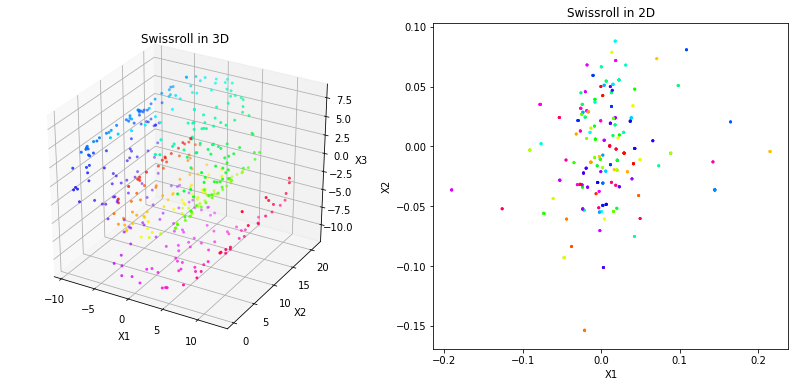

In [59]:
#plot

fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(xs=swissroll_data.T[0],ys=swissroll_data.T[1],zs=swissroll_data.T[2],s=4, c=swissroll_ref,cmap='hsv')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

#ax.set_xticks([-1,-0.5,0,0.5,1])
#ax.set_yticks([-1,-0.5,0,0.5,1])
#ax.set_zticks([-1,-0.5,0,0.5,1])
ax.set_title('Swissroll in 3D')

ax = fig.add_subplot(1, 2, 2)
ax.scatter(x=swissroll_lle.T[0],y=swissroll_lle.T[1],s=4, c=swissroll_ref,cmap='hsv')

ax.set_xlabel('X1')
ax.set_ylabel('X2')

ax.set_title('Swissroll in 2D') #I think this should be a rectangle (with infinite data points)

In [60]:
fishbowl_ref.shape

(2000,)

In [39]:
#apply lle

flatroll_lle=lle(flatroll_data,1,0.00001,'eps-ball',epsilon=11)

In [40]:
flatroll_lle #only real values --- perhaps because lle accurately handles 2d to 1d but not 3d to 2d

array([[ 2.51955073e-02],
       [ 3.12554880e-02],
       [ 2.08677650e-02],
       [ 3.13990712e-02],
       [-4.55437482e-02],
       [ 1.51887341e-02],
       [ 2.81062366e-02],
       [-5.04669784e-02],
       [ 3.07901132e-02],
       [ 3.06455965e-02],
       [ 2.34971162e-02],
       [ 3.03820189e-02],
       [ 3.10054087e-02],
       [-5.66434527e-02],
       [ 2.39149838e-02],
       [ 2.36814897e-02],
       [ 1.68025198e-02],
       [ 3.14832065e-02],
       [ 1.95562502e-02],
       [ 3.06110393e-02],
       [-4.27870593e-02],
       [-9.76211487e-03],
       [ 2.86554828e-02],
       [ 3.13848182e-02],
       [-3.66717239e-02],
       [ 1.24292863e-02],
       [ 3.24795737e-03],
       [ 2.75940405e-02],
       [-4.16082157e-02],
       [ 2.48725044e-02],
       [-2.45647817e-02],
       [-1.83947720e-02],
       [ 2.65504565e-02],
       [-1.06626655e-02],
       [ 1.49093282e-02],
       [ 2.61058000e-02],
       [-2.97244427e-02],
       [ 2.66392756e-02],
       [ 3.0

Text(0.5, 1.0, 'Flatroll in 2D')

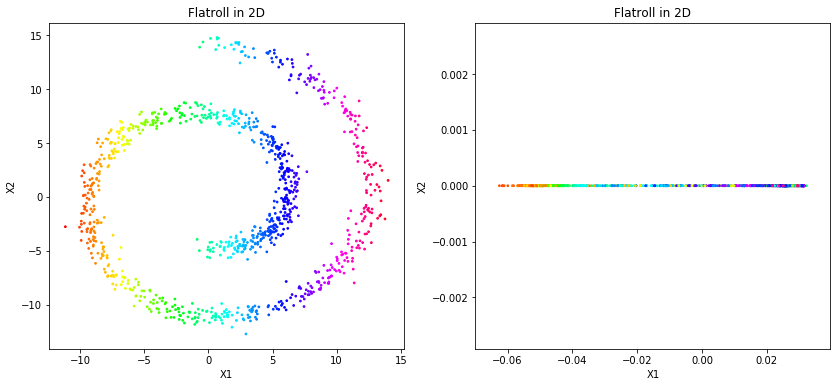

In [62]:
#plot

fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x=flatroll_data.T[0],y=flatroll_data.T[1],s=3, c=flatroll_data.T[0],cmap='hsv')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
#ax.set_xticks([-1,-0.5,0,0.5,1])
#ax.set_yticks([-1,-0.5,0,0.5,1])
#ax.set_zticks([-1,-0.5,0,0.5,1])
ax.set_title('Flatroll in 2D')

ax = fig.add_subplot(1, 2, 2)
y=np.zeros((len(flatroll_data),))
ax.scatter(x=flatroll_lle.T,y=y,s=3, c=flatroll_data.T[0],cmap='hsv')

ax.set_xlabel('X1')
ax.set_ylabel('X2')

ax.set_title('Flatroll in 2D') #I think this should be a line. (correct)

In [51]:
swissroll_ref.shape

(400,)

In [189]:
X = np.array([  [   0.5376671395461, -2.25884686100365, 0.318765239858981, -0.433592022305684, 3.57839693972576,
                    -1.34988694015652, 0.725404224946106, 0.714742903826096, -0.124144348216312, 1.40903448980048,
                    0.67149713360808, 0.717238651328838, 0.488893770311789, 0.726885133383238, 0.293871467096658,
                    0.888395631757642, -1.06887045816803, -2.9442841619949, 0.325190539456198, 1.37029854009523],
                [   1.83388501459509, 0.862173320368121, -1.30768829630527, 0.34262446653865, 2.76943702988488,
                    3.03492346633185, -0.0630548731896562, -0.204966058299775, 1.48969760778546, 1.41719241342961,
                    -1.20748692268504, 1.63023528916473, 1.03469300991786, -0.303440924786016, -0.787282803758638,
                    -1.14707010696915, -0.809498694424876, 1.4383802928151, -0.754928319169703, -1.7115164188537],[   1.83388501459509, 0.862173320368121, -1.30768829630527, 0.34262446653865, 2.76943702988488,
                    3.03492346633185, -0.0630548731896562, -0.204966058299775, 1.48969760778546, 1.41719241342961,
                    -1.20748692268504, 1.63023528916473, 1.03469300991786, -0.303440924786016, -0.787282803758638,
                    -1.14707010696915, -0.809498694424876, 1.4383802928151, -0.754928319169703, -1.7115164188537]]).T

In [206]:
from scipy.sparse.csgraph import connected_components
n_rule='knn'
k=3
#epsilon=3
#X=swissroll_data
m=2
tol=0.000001
"""
        Locally Linear Embedding
    """
    
    # compute neighborhoord by kNN or eps-bole rule
    
    # 1. calculate euclidean distance of data
D = sp.distance_matrix(X, X)
print('D')
print(D.shape)
#F=np.empty((3,3))
#print(F)
    
    # 2. check for applied rule
if n_rule == 'knn':
        # check if k is provided
    assert (k != None), """The parameter 'k' is required for the 'knn' rule"""
        # 3a. calculate k nearest neighbors
        # Sort distance matrix
    kn = np.argsort(D,kind='mergesort')
        # identify k-nearest neighbors
    kn = kn[:,1:k+1]
    print('kn\n',kn)
    print(kn.shape)
        
elif n_rule == 'eps-ball':
        # check if epsilon is provided
    assert (epsilon != None), """The parameter 'epsilon' is required for the 'eps-ball' rule"""
        # 3b. compare distance by epsilon
        # tupel (1. element, 2. element)
    #idx = np.argwhere(D<epsilon) #CHECK
    kn=D<epsilon
    #print(idx.shape)
    #print(idx)
    # row wise all points in the neighborhood
    #kn = [idx[:,1][idx[:,0]==i] for i in np.unique(idx[:,0])]
    #kn=np.empty()
    #for i in np.unique(idx[:,0]):
    #   kn=idx[:,1][idx[:,0]==i]
    
    
    print('kn\n',np.shape(kn))
    print(kn)
else:
    print("""The following rule {} is not known. Please use either 'knn' or 'eps-ball'.""".format(n_rule))
    
    # 4. calculate reconstruction weights 
    # intialize weight matrix
W = np.zeros((len(X),len(X)))

    # calculate weights for every point
for i in range(len(X)):
        # calculate covariance matrix
    C = np.cov(X[kn[i]])
        # solve for weights 
    I = np.eye(len(X[kn[i]]))
    weights = np.linalg.inv(C-tol*I).dot(np.ones(len(X[kn[i]])).reshape(len(X[kn[i]]),1))
        # normalize weights
    weights = (1/(weights.T.dot(np.ones(len(X[kn[i]])).reshape(len(X[kn[i]]),1)))*weights).reshape(len(X[kn[i]]))
    W[i,kn[i]] = weights
print('W\n',W.shape)
print(W)
    # 5. calculate cost matrix
I = np.eye(len(X))
M = (I - W).T@(I-W)
print('M\n',M)
print(M.shape)
    
    # 6. Obtain eigenvalues and eigenvector of M
eigen_values, eigen_vector = np.linalg.eigh(M)
    # sort eigenvalues in ascending order
eigen_kn = np.argsort(abs(eigen_values),kind='mergesort').reshape(len(X),1)
    # sort eigenvectors by eigenvalues, eigenvector along columns, first eigenvector -> [:,0]
V = -1*np.take_along_axis(eigen_vector.T, eigen_kn, axis = 0).T # CAVEAT: mulitplying by -1 because numpy.eig routine delivers wrong sign
print(V.shape)
print(V)
    # 7. embedded dimension 
Y = V[:,1:m+1]
    
    #8. Check connected graph
if (connected_components(V,directed=False)[0]!=1):
        raise ValueError('Graphs are not connected!')


D
(20, 20)
kn
 [[11  8  9]
 [17  3  8]
 [10 15 14]
 [ 6 12  7]
 [ 9 11  0]
 [ 8  0 17]
 [ 7 13 18]
 [13  6 18]
 [ 0 11 12]
 [11  0 12]
 [15  2 14]
 [ 0  9  8]
 [11  8  9]
 [ 7  6 18]
 [18 10  2]
 [10  2 14]
 [14 18  2]
 [ 1  5  8]
 [14 10 13]
 [15 10  2]]
(20, 3)
W
 (20, 20)
[[ 0.          0.          0.          0.          0.          0.
   0.          0.         -0.16793974  0.87893986  0.          0.28899989
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.80271733  0.          0.
   0.          0.          0.53730678  0.          0.          0.
   0.          0.          0.          0.          0.         -0.34002412
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -0.34616019  0.
   0.          0.          2.18968657 -0.84352638  0.          0.
   0.          0.        ]
 [ 0.          0.          0.    

In [215]:
Y.shape

(20, 2)

In [208]:
C = np.cov(X[kn[0]])
C.shape

(3, 3)

(20, 3)

In [158]:
kn

array([[ True, False, False,  True, False,  True,  True,  True,  True,
         True, False,  True,  True, False, False, False, False, False,
        False, False],
       [False,  True, False,  True, False, False, False, False,  True,
        False, False, False,  True, False, False, False,  True,  True,
        False, False],
       [False, False,  True,  True, False, False,  True,  True, False,
        False,  True, False, False,  True,  True,  True,  True, False,
         True,  True],
       [ True,  True,  True,  True, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False],
       [False, False, False, False,  True, False, False, False, False,
         True, False, False, False, False, False, False, False, False,
        False, False],
       [ True, False, False, False, False,  True, False, False,  True,
        False, False,  True, False, False, False, False, False,  True,
        False, False],
       [ T